## Polyglot Jupyter Notebook: Conference Contributions per Country

#### Scraping the conference data from a web table using `ruby's nokogiri` library

In [1]:
%polyglot ruby rows

require "nokogiri"; require "open-uri"
url = "https://2018.splashcon.org/people-index" # "https://2019.programming-conference.org/people-index"
doc = Nokogiri::HTML(open(url))
# use global variables as a workaround for https://github.com/oracle/truffleruby/issues/1695
$rows = doc.css("#results-table .row").map { |row| row.css("div").map(&:content) }
$rows.length

998

#### Compiling a list of all contributing countries using `python's pycountry` library

In [2]:
%polyglot python countries

import polyglot
import pycountry
rows = polyglot.import_value('rows')
countries = [c.name for c in pycountry.countries for row in rows if c.name in str(row[2]) or c.name in str(row[1])]
len(countries)

576

#### Writing a helper function to display SVG graphics using `javascript`

In [3]:
%polyglot js convertSvgToDisplayable

if (typeof SvgDisplayable === 'undefined') {
    var SvgDisplayable
}

SvgDisplayable = class {
    constructor(svgCode) {
        this.svg = '' + svgCode;
    }

    _toSvg() {
        return this.svg
    }
}

convertSvgToDisplayable = svgCode => new SvgDisplayable(svgCode)

[Function: convertSvgToDisplayable]

#### Plotting the conference contributions per country using `R's ggplot2` library

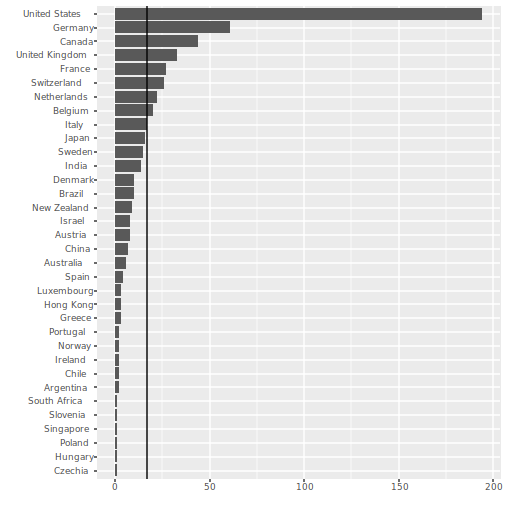

In [4]:
%polyglot R

display <- import("convertSvgToDisplayable")
countries <- import("countries")

library(ggplot2)

values <- data.frame(contributors = countries)
data <- aggregate(x = values, by = list(countries = values$contributors), FUN = length)

svg()
plt <- ggplot(data, aes(x = reorder(countries, +contributors), contributors)) +
  geom_bar(stat = "identity") + xlab("") + ylab("") + coord_flip() +
  geom_hline(aes(yintercept = mean(contributors)))
print(plt)
svg <- svg.off()

display(svg)